In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
from pprint import pprint
import os
from sklearn import preprocessing
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client.client.flux_table import FluxTable
import datetime
from typing import List
import itertools
import datetime
import itertools
import math
import apache_log_parser
from datetime import datetime

In [2]:
raw_df_S = pd.read_csv("clarknet_access_log_Aug28.csv").to_numpy()

In [5]:
df_S = pd.DataFrame([{"date": datetime.fromisoformat(df[1]), "count": df[2]} for df in raw_df_S])
df_S

,date,count
0,1995-08-28 00:00:34,1
1,1995-08-28 00:00:35,2
2,1995-08-28 00:00:36,2
3,1995-08-28 00:00:37,2
4,1995-08-28 00:00:38,4
...,...,...
604702,1995-09-03 23:58:56,3
604703,1995-09-03 23:58:57,2
604704,1995-09-03 23:58:58,1
604705,1995-09-03 23:58:59,4


In [8]:

df_M = df_S.groupby(pd.Grouper(key="date", freq="min")).sum().reset_index()
df_M

,date,count
0,1995-08-28 00:00:00,44
1,1995-08-28 00:01:00,124
2,1995-08-28 00:02:00,166
3,1995-08-28 00:03:00,117
4,1995-08-28 00:04:00,182
...,...,...
10075,1995-09-03 23:55:00,154
10076,1995-09-03 23:56:00,220
10077,1995-09-03 23:57:00,168
10078,1995-09-03 23:58:00,151


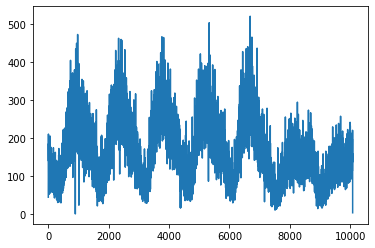

In [9]:
plt.plot(df_M["count"])

In [10]:
def sampen_loop(ser: List[float], batch_size = 100) -> List[float]:
    return [nk.entropy_sample(np.array(ser[index-batch_size:index]))[0] for index in range(len(ser))[batch_size:]]

In [11]:
clark_samppen_loop = sampen_loop(df_M["count"])

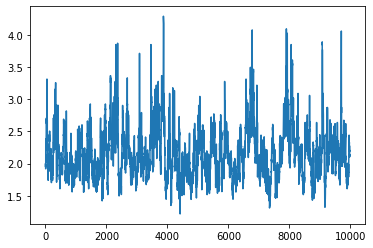

In [12]:
plt.plot(clark_samppen_loop)

In [13]:
np.zeros(10000)

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
clark_samppen_loop_02 = sampen_loop(np.zeros(10000))

In [15]:
clark_samppen_loop_02

[-0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,

In [16]:
df_10M = df_S.groupby(pd.Grouper(key="date", freq="10min")).sum().reset_index()
df_10M

,date,count
0,1995-08-28 00:00:00,1493
1,1995-08-28 00:10:00,1543
2,1995-08-28 00:20:00,1265
3,1995-08-28 00:30:00,1116
4,1995-08-28 00:40:00,1567
...,...,...
1003,1995-09-03 23:10:00,1407
1004,1995-09-03 23:20:00,1489
1005,1995-09-03 23:30:00,1558
1006,1995-09-03 23:40:00,1482


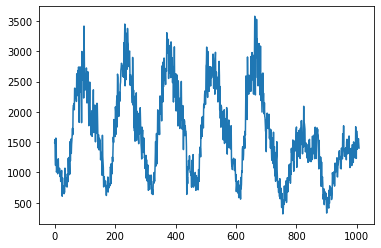

In [21]:
plt.plot(df_10M["count"])

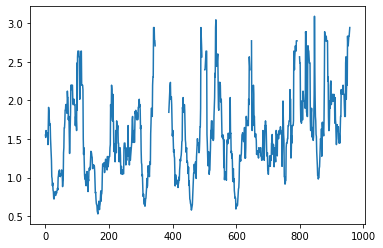

In [25]:
clark_samppen_loop_03 = sampen_loop(df_10M["count"], 50)
plt.plot(clark_samppen_loop_03)

In [26]:
clark_samppen_loop_03

[1.550597412411167,
 1.5198257537444133,
 1.6094379124341003,
 1.575536360758419,
 1.550597412411167,
 1.550597412411167,
 1.575536360758419,
 1.575536360758419,
 1.4271163556401458,
 1.6863989535702288,
 1.9095425048844388,
 1.8718021769015911,
 1.7635885922613588,
 1.704748092238425,
 1.6817585740137264,
 1.6945957207744071,
 1.512588086444183,
 1.4170660197866445,
 1.3099213823353166,
 1.2205021062771464,
 1.0116009116784799,
 0.9858167945227653,
 0.8938178760220965,
 0.9315582040049437,
 0.8373967894044917,
 0.8183103235139513,
 0.7351113796589771,
 0.7213180575266415,
 0.7855205006909605,
 0.7758388964050589,
 0.7985076962177717,
 0.8194409058842373,
 0.7672551527136673,
 0.7922380832041762,
 0.8157495026522775,
 0.7963314167951759,
 0.8266785731844679,
 0.832909122935104,
 0.8622235106038791,
 0.8397506547518206,
 0.9985288301111273,
 1.024504316514388,
 1.0726368022648491,
 1.0185695809945734,
 1.0986122886681096,
 1.041453874828161,
 1.0414538748281608,
 1.0116009116784797,
 1.

In [24]:
np.divide(10, 0)

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_14200/884577342.py:1: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(10, 0)


inf

In [33]:
import matplotlib.pyplot as pl
import numpy as np

def random_pulse_generate(x, scale):
    return np.sin(x) + np.random.normal(scale=scale, size=len(x))

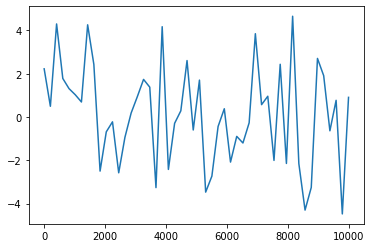

In [37]:
x = np.linspace(1, 10000)



pl.plot(x, random_pulse_generate(x, 2))

In [44]:
x = np.linspace(1, 10000)
random_1 = random_pulse_generate(x, 2)

In [47]:
pd.DataFrame(x, random_1)

,0
1.587387,1.000000
1.189389,205.061224
0.109594,409.122449
3.235352,613.183673
-1.036385,817.244898
2.367730,1021.306122
-0.530958,1225.367347
0.200977,1429.428571
0.374188,1633.489796
2.518163,1837.551020


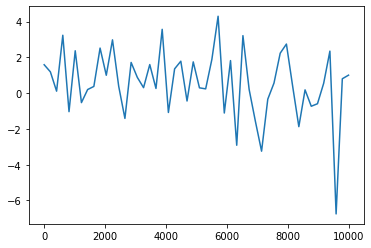

In [45]:
pl.plot(x, random_1)

In [39]:
random_sampen_1 = sampen_loop(random_1)

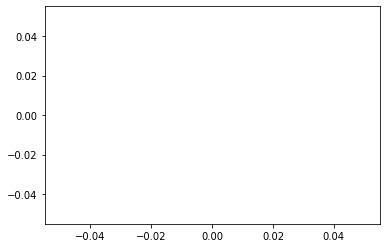

In [40]:
plt.plot(random_sampen_1)